In [1]:
import pandas as pd
import random

def generate_sample(stage):
    if stage == 0:
        hrv = random.randint(70, 100)
        emg = 'normal'
        posture = 'aligned'
    elif stage == 1:
        hrv = random.randint(50, 70)
        emg = random.choice(['normal', 'overactive'])
        posture = random.choice(['slouched', 'lean_left', 'lean_right'])
    else:  # stage 2
        hrv = random.randint(30, 50)
        emg = random.choice(['underactive', 'overactive'])
        posture = random.choice(['slouched', 'lean_left', 'lean_right'])

    return {
        'hrv': hrv,
        'emg_level': emg,
        'posture': posture,
        'stage': stage
    }

data = []
for _ in range(170):
    data.append(generate_sample(0))
for _ in range(170):
    data.append(generate_sample(1))
for _ in range(160):
    data.append(generate_sample(2))

df = pd.DataFrame(data)

df.to_csv("neurovascular_dataset.csv", index=False)

print(" Dataset created: neurovascular_dataset.csv")


 Dataset created: neurovascular_dataset.csv


In [2]:
import pandas as pd

df = pd.read_csv("neurovascular_dataset.csv")
df.head()




,hrv,emg_level,posture,stage
0,72,normal,aligned,0
1,93,normal,aligned,0
2,92,normal,aligned,0
3,81,normal,aligned,0
4,99,normal,aligned,0


In [3]:
import pandas as pd

df = pd.read_csv("neurovascular_dataset.csv")

print(df.isnull().sum())
print(df.dtypes)

duplicates = df.duplicated().sum()
print(duplicates)

df = df.drop_duplicates()

print(df['emg_level'].unique())
print(df['posture'].unique())

print(df['hrv'].min(), df['hrv'].max())


hrv          0
emg_level    0
posture      0
stage        0
dtype: int64
hrv           int64
emg_level    object
posture      object
stage         int64
dtype: object
281
['normal' 'overactive' 'underactive']
['aligned' 'slouched' 'lean_left' 'lean_right']
30 100


C:\Users\torah\AppData\Local\Temp\ipykernel_18788\290600624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stage', data=df, palette='cool')


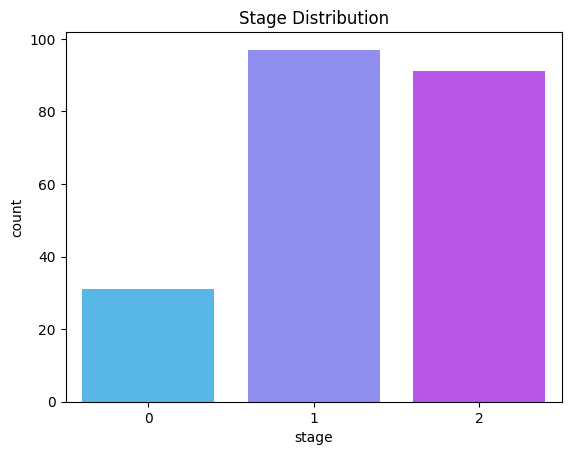

C:\Users\torah\AppData\Local\Temp\ipykernel_18788\290600624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stage', y='hrv', data=df, palette='Set2')


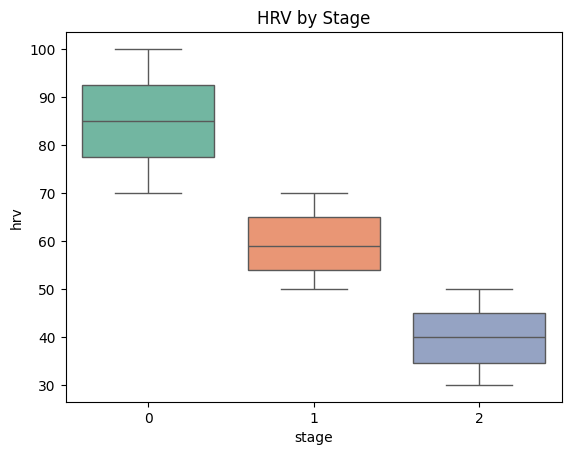

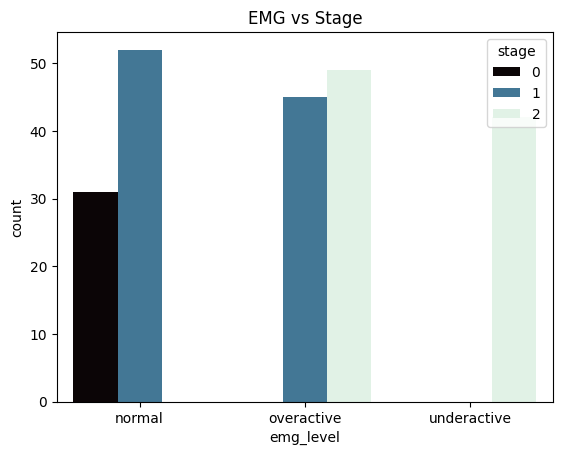

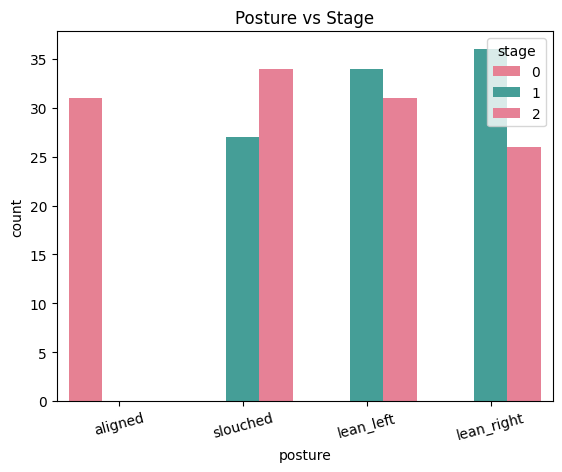

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='stage', data=df, palette='cool')
plt.title("Stage Distribution")
plt.show()

sns.boxplot(x='stage', y='hrv', data=df, palette='Set2')
plt.title("HRV by Stage")
plt.show()

sns.countplot(x='emg_level', hue='stage', data=df, palette='mako')
plt.title("EMG vs Stage")
plt.show()

sns.countplot(x='posture', hue='stage', data=df, palette='husl')
plt.title("Posture vs Stage")
plt.xticks(rotation=15)
plt.show()



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df_encoded = pd.get_dummies(df, columns=['emg_level', 'posture'])

X = df_encoded.drop('stage', axis=1)
y = df_encoded['stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.9772727272727273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.94      0.97        17
           2       0.95      1.00      0.98        21

    accuracy                           0.98        44
   macro avg       0.98      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



In [6]:
import random

# Simulate 10 predictions from your trained model (or use actual ones if available)
simulated_predictions = [random.choice([0, 1, 2]) for _ in range(10)]
print("Simulated Stage History:", simulated_predictions)

# Convert to Recovery Progress Index (0–100)
# Higher score = more healing trend
def calculate_rpi(predictions):
    score = 0
    for i in range(1, len(predictions)):
        if predictions[i] < predictions[i-1]:  # stage got better
            score += 10
        elif predictions[i] == predictions[i-1]:  # no change
            score += 3
        else:  # got worse
            score -= 5
    score = max(0, min(100, score + 50))  # shift and cap
    return score

rpi = calculate_rpi(simulated_predictions)
print("Recovery Progress Index (RPI):", rpi)


Simulated Stage History: [2, 2, 1, 2, 1, 0, 2, 1, 2, 0]
Recovery Progress Index (RPI): 88


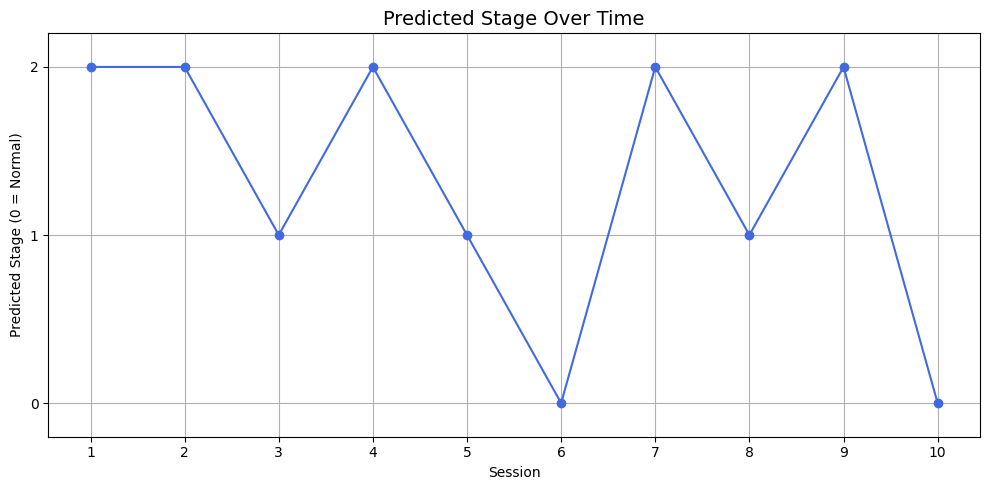

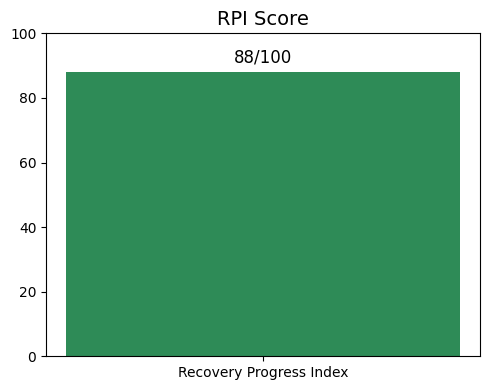

In [7]:
import matplotlib.pyplot as plt

# Simulated prediction history (you can replace with real model predictions)
predictions = [2, 2, 1, 2, 1, 0, 2, 1, 2, 0]

# Calculate RPI (reuse same function)
def calculate_rpi(predictions):
    score = 0
    for i in range(1, len(predictions)):
        if predictions[i] < predictions[i-1]:
            score += 10
        elif predictions[i] == predictions[i-1]:
            score += 3
        else:
            score -= 5
    return max(0, min(100, score + 50))

rpi = calculate_rpi(predictions)

# Plot stage trend
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(predictions)+1), predictions, marker='o', linestyle='-', color='royalblue')
plt.title("Predicted Stage Over Time", fontsize=14)
plt.xlabel("Session")
plt.ylabel("Predicted Stage (0 = Normal)")
plt.ylim(-0.2, 2.2)
plt.grid(True)
plt.xticks(range(1, len(predictions)+1))
plt.yticks([0, 1, 2])
plt.tight_layout()
plt.show()

# Show RPI
plt.figure(figsize=(5, 4))
plt.bar(['Recovery Progress Index'], [rpi], color='seagreen')
plt.ylim(0, 100)
plt.title("RPI Score", fontsize=14)
plt.text(0, rpi + 3, f"{rpi}/100", ha='center', fontsize=12)
plt.tight_layout()
plt.show()



In [8]:
# Signal Quality Checker
def check_signal_quality(hrv, emg_level, posture):
    if not (20 <= hrv <= 120):
        return "bad"
    if emg_level not in ['normal', 'overactive', 'underactive']:
        return "bad"
    if posture not in ['aligned', 'slouched', 'lean_left', 'lean_right']:
        return "bad"
    return "good"

# Apply to your dataset
df['signal_quality'] = df.apply(
    lambda row: check_signal_quality(row['hrv'], row['emg_level'], row['posture']),
    axis=1
)

# See how many sessions are good vs bad
print(df['signal_quality'].value_counts())


signal_quality
good    219
Name: count, dtype: int64


In [11]:
df['signal_quality'] = df.apply(
    lambda row: check_signal_quality(row['hrv'], row['emg_level'], row['posture']),
    axis=1
)


In [12]:
df_clean = df[df['signal_quality'] == 'good']


In [13]:
import random

def simulate_signal_capture():
    hrv = random.randint(30, 100)
    emg_level = random.choice(['normal', 'overactive', 'underactive'])
    posture = random.choice(['aligned', 'slouched', 'lean_left', 'lean_right'])
    return hrv, emg_level, posture

# Capture signal for a session
hrv, emg_level, posture = simulate_signal_capture()
print("Captured:", hrv, emg_level, posture)


Captured: 65 underactive aligned


In [14]:
import pandas as pd
import random

# 1. Simulate signal
def simulate_signal_capture():
    hrv = random.randint(30, 100)
    emg_level = random.choice(['normal', 'overactive', 'underactive'])
    posture = random.choice(['aligned', 'slouched', 'lean_left', 'lean_right'])
    return hrv, emg_level, posture

# 2. Signal quality checker
def check_signal_quality(hrv, emg_level, posture):
    if not (20 <= hrv <= 120):
        return "bad"
    if emg_level not in ['normal', 'overactive', 'underactive']:
        return "bad"
    if posture not in ['aligned', 'slouched', 'lean_left', 'lean_right']:
        return "bad"
    return "good"

# 3. RPI calculator
def calculate_rpi(predictions):
    score = 0
    for i in range(1, len(predictions)):
        if predictions[i] < predictions[i-1]:
            score += 10
        elif predictions[i] == predictions[i-1]:
            score += 3
        else:
            score -= 5
    return max(0, min(100, score + 50))

# 4. Run a single session
hrv, emg, posture = simulate_signal_capture()
quality = check_signal_quality(hrv, emg, posture)

# If signal is good, predict stage
if quality == "good":
    # One-hot encode emg and posture
    input_df = pd.DataFrame([{
        'hrv': hrv,
        'emg_level': emg,
        'posture': posture
    }])
    input_encoded = pd.get_dummies(input_df)
    
    # Match model's expected columns
    for col in X.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    input_encoded = input_encoded[X.columns]
    
    predicted_stage = model.predict(input_encoded)[0]
    
    # Log session
    session_log = pd.DataFrame([{
        'hrv': hrv,
        'emg_level': emg,
        'posture': posture,
        'predicted_stage': predicted_stage,
        'signal_quality': quality
    }])
    
    # Load previous if exists, else create
    try:
        full_log = pd.read_csv("session_log.csv")
        full_log = pd.concat([full_log, session_log], ignore_index=True)
    except:
        full_log = session_log

    # Update RPI
    rpi = calculate_rpi(full_log['predicted_stage'].tolist())
    session_log['RPI'] = rpi

    # Save updated log
    full_log.to_csv("session_log.csv", index=False)

    # Show summary
    print("\n✅ Session Captured Successfully")
    print(session_log)

else:
    print("\n ⚠️Signal rejected: Poor quality. Please retake session.")
    print(f"Captured: HRV={hrv}, EMG={emg}, Posture={posture}")



✅ Session Captured Successfully
   hrv   emg_level     posture  predicted_stage signal_quality  RPI
0   31  overactive  lean_right                2           good   50


In [15]:
def give_feedback(predicted_stage):
    if predicted_stage == 2:
        return "⚠️ High-risk signal detected. Sit upright, relax muscles. Initiating deep-breath prompt and posture correction."
    elif predicted_stage == 1:
        return "🟡 Moderate vascular load. Please adjust posture and stay relaxed."
    elif predicted_stage == 0:
        return "✅ You're healing well. Keep posture aligned and continue light activity."
    else:
        return "Unknown stage."

feedback = give_feedback(predicted_stage)
print("Feedback:", feedback)


Feedback: ⚠️ High-risk signal detected. Sit upright, relax muscles. Initiating deep-breath prompt and posture correction.


In [16]:

import pandas as pd
import random

# 1. Simulate signal
def simulate_signal_capture():
    hrv = random.randint(30, 100)
    emg_level = random.choice(['normal', 'overactive', 'underactive'])
    posture = random.choice(['aligned', 'slouched', 'lean_left', 'lean_right'])
    return hrv, emg_level, posture

# 2. Signal quality checker
def check_signal_quality(hrv, emg_level, posture):
    if not (20 <= hrv <= 120):
        return "bad"
    if emg_level not in ['normal', 'overactive', 'underactive']:
        return "bad"
    if posture not in ['aligned', 'slouched', 'lean_left', 'lean_right']:
        return "bad"
    return "good"

# 3. RPI calculator
def calculate_rpi(predictions):
    score = 0
    for i in range(1, len(predictions)):
        if predictions[i] < predictions[i-1]:
            score += 10
        elif predictions[i] == predictions[i-1]:
            score += 3
        else:
            score -= 5
    return max(0, min(100, score + 50))

# 4. Feedback logic
def give_feedback(predicted_stage):
    if predicted_stage == 2:
        return "⚠️ High-risk: Sit upright, relax legs. Initiating deep-breathing."
    elif predicted_stage == 1:
        return "🟡 Moderate stage: Adjust posture and stay calm."
    elif predicted_stage == 0:
        return "✅ You're healing. Great posture! Keep it up."
    else:
        return "Unknown stage."

# 5. Run a single session
hrv, emg, posture = simulate_signal_capture()
quality = check_signal_quality(hrv, emg, posture)

if quality == "good":
    input_df = pd.DataFrame([{
        'hrv': hrv,
        'emg_level': emg,
        'posture': posture
    }])
    input_encoded = pd.get_dummies(input_df)
    
    for col in X.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    input_encoded = input_encoded[X.columns]
    
    predicted_stage = model.predict(input_encoded)[0]
    feedback = give_feedback(predicted_stage)
    
    session_log = pd.DataFrame([{
        'hrv': hrv,
        'emg_level': emg,
        'posture': posture,
        'predicted_stage': predicted_stage,
        'signal_quality': quality,
        'feedback': feedback
    }])
    
    try:
        full_log = pd.read_csv("session_log.csv")
        full_log = pd.concat([full_log, session_log], ignore_index=True)
    except:
        full_log = session_log

    rpi = calculate_rpi(full_log['predicted_stage'].tolist())
    session_log['RPI'] = rpi
    full_log.to_csv("session_log.csv", index=False)

    print("\n✅ Session Captured Successfully")
    print(session_log[['hrv', 'emg_level', 'posture', 'predicted_stage', 'RPI', 'feedback']])

else:
    print("\n⚠️ Signal rejected: Poor quality. Please retake session.")
    print(f"Captured: HRV={hrv}, EMG={emg}, Posture={posture}")



✅ Session Captured Successfully
   hrv    emg_level  posture  predicted_stage  RPI  \
0   46  underactive  aligned                2   53   

                                            feedback  
0  ⚠️ High-risk: Sit upright, relax legs. Initiat...  


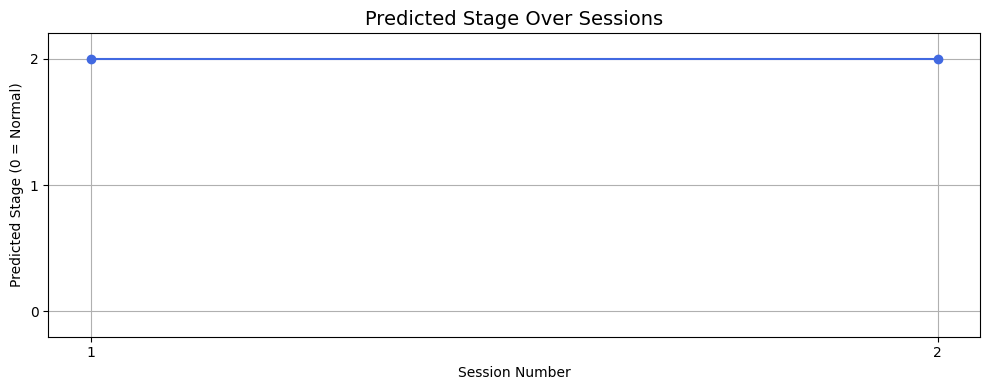

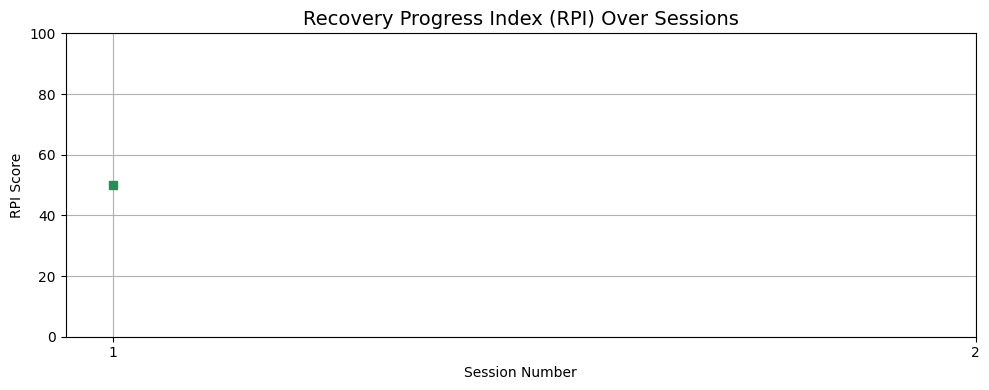

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load session log
df = pd.read_csv("session_log.csv")

# Plot 1: Predicted Stage over Sessions
plt.figure(figsize=(10, 4))
plt.plot(df.index + 1, df['predicted_stage'], marker='o', linestyle='-', color='royalblue')
plt.title("Predicted Stage Over Sessions", fontsize=14)
plt.xlabel("Session Number")
plt.ylabel("Predicted Stage (0 = Normal)")
plt.ylim(-0.2, 2.2)
plt.grid(True)
plt.xticks(range(1, len(df)+1))
plt.yticks([0, 1, 2])
plt.tight_layout()
plt.show()

# Plot 2: RPI Progress
plt.figure(figsize=(10, 4))
plt.plot(df.index + 1, df['RPI'], marker='s', linestyle='--', color='seagreen')
plt.title("Recovery Progress Index (RPI) Over Sessions", fontsize=14)
plt.xlabel("Session Number")
plt.ylabel("RPI Score")
plt.ylim(0, 100)
plt.grid(True)
plt.xticks(range(1, len(df)+1))
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

# Load your log
df = pd.read_csv("session_log.csv")

# Add session number column
df['Session'] = df.index + 1

# Reorder + rename columns
summary_df = df[['Session', 'hrv', 'emg_level', 'posture', 'predicted_stage', 'RPI', 'feedback']]
summary_df.columns = ['Session', 'HRV', 'EMG', 'Posture', 'Stage', 'RPI', 'Feedback']

# Export to CSV
summary_df.to_csv("doctor_summary.csv", index=False)

print("✅ Doctor summary exported as 'doctor_summary.csv'")


✅ Doctor summary exported as 'doctor_summary.csv'


In [19]:
import pandas as pd
import random

# Simulate signal
def simulate_signal_capture():
    hrv = random.randint(25, 100)
    emg_level = random.choice(['normal', 'overactive', 'underactive'])
    posture = random.choice(['aligned', 'slouched', 'lean_left', 'lean_right'])
    return hrv, emg_level, posture

# Signal quality check
def check_signal_quality(hrv, emg_level, posture):
    if not (20 <= hrv <= 120):
        return "bad"
    if emg_level not in ['normal', 'overactive', 'underactive']:
        return "bad"
    if posture not in ['aligned', 'slouched', 'lean_left', 'lean_right']:
        return "bad"
    return "good"

# Feedback generator
def give_feedback(predicted_stage):
    if predicted_stage == 2:
        return "⚠️ High-risk: Sit upright, relax legs. Initiating deep-breathing."
    elif predicted_stage == 1:
        return "🟡 Moderate stage: Adjust posture and stay calm."
    elif predicted_stage == 0:
        return "✅ You're healing. Great posture! Keep it up."
    else:
        return "Unknown stage."

# RPI calculator
def calculate_rpi(predictions):
    score = 0
    for i in range(1, len(predictions)):
        if predictions[i] < predictions[i - 1]:
            score += 10
        elif predictions[i] == predictions[i - 1]:
            score += 3
        else:
            score -= 5
    return max(0, min(100, score + 50))

# Run 50 sessions
simulated_sessions = []
predicted_list = []

while len(simulated_sessions) < 50:
    hrv, emg, posture = simulate_signal_capture()
    quality = check_signal_quality(hrv, emg, posture)

    if quality == "bad":
        continue  # Skip this round

    # Encode input
    input_df = pd.DataFrame([{
        'hrv': hrv,
        'emg_level': emg,
        'posture': posture
    }])
    input_encoded = pd.get_dummies(input_df)

    for col in X.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    input_encoded = input_encoded[X.columns]

    # Predict stage
    predicted_stage = model.predict(input_encoded)[0]
    predicted_list.append(predicted_stage)
    rpi = calculate_rpi(predicted_list)
    feedback = give_feedback(predicted_stage)

    session = {
        'Session': len(simulated_sessions) + 1,
        'HRV': hrv,
        'EMG': emg,
        'Posture': posture,
        'Stage': predicted_stage,
        'Signal Quality': quality,
        'RPI': rpi,
        'Feedback': feedback
    }
    simulated_sessions.append(session)

# Save to CSV
df_sim = pd.DataFrame(simulated_sessions)
df_sim.to_csv("simulated_patient_log.csv", index=False)

print("✅ 50 Patient Sessions Simulated and Logged as 'simulated_patient_log.csv'")


✅ 50 Patient Sessions Simulated and Logged as 'simulated_patient_log.csv'


In [20]:
pip install reportlab


   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------- ----------------------- 0.8/2.0 MB 4.8 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
from reportlab.lib.pagesizes import A4
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Spacer
import pandas as pd

# Load the simulated patient data
df = pd.read_csv("simulated_patient_log.csv")

# Convert all data to string for PDF
df = df.astype(str)

# Create the PDF document
doc = SimpleDocTemplate("neurovascular_doctor_report.pdf", pagesize=A4)
elements = []

# Title
styles = getSampleStyleSheet()
title = Paragraph("Neurovascular Patient Session Summary", styles['Title'])
elements.append(title)
elements.append(Spacer(1, 12))

# Table data (headers + rows)
data = [list(df.columns)] + df.values.tolist()

# Create table
table = Table(data, repeatRows=1)

# Style it
table.setStyle(TableStyle([
    ('BACKGROUND', (0,0), (-1,0), colors.darkblue),
    ('TEXTCOLOR', (0,0), (-1,0), colors.whitesmoke),
    ('ALIGN',(0,0),(-1,-1),'CENTER'),
    ('FONTNAME', (0,0), (-1,0), 'Helvetica-Bold'),
    ('FONTSIZE', (0,0), (-1,0), 10),
    ('BOTTOMPADDING', (0,0), (-1,0), 8),
    ('BACKGROUND',(0,1),(-1,-1),colors.beige),
    ('GRID', (0,0), (-1,-1), 0.5, colors.grey),
]))

elements.append(table)

# Build PDF
doc.build(elements)

print("✅ Doctor PDF Report Generated: 'neurovascular_doctor_report.pdf'")


✅ Doctor PDF Report Generated: 'neurovascular_doctor_report.pdf'


In [22]:
import joblib

# Save your trained model
joblib.dump(model, "neurovas.pkl")


['neurovas.pkl']

In [23]:
pd.DataFrame(X.columns).to_csv("X_columns.csv", index=False)
